**EDA - 1**

Bike Details dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('BIKE DETAILS.csv')

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
#Q.1.What is the range of selling prices in the datase?
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print(f"Minimum Selling Price: ₹{min_price}")
print(f"Maximum Selling Price: ₹{max_price}")
print(f"Range of Selling Prices: ₹{price_range}")

Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range of Selling Prices: ₹755000


In [ ]:
#Q.2.  What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()

print(f"Median Selling Price: ₹{median_price}")


Median Selling Price: ₹45000.0


In [ ]:
#Q.3.  What is the most common seller type?
seller_counts = df['seller_type'].value_counts()
most_common_seller = seller_counts.idxmax()

print(f"Most Common Seller Type: {most_common_seller}")

Most Common Seller Type: Individual


In [ ]:
#Q.4.  How many bikes have driven more than 50,000 kilometers?
bikes_driven_above_50k = df[df['km_driven'] > 50000]
bikes_driven_above_50k_count = len(bikes_driven_above_50k)

print(f"Number of Bikes Driven Above 50,000 Kilometers: {bikes_driven_above_50k_count}")

Number of Bikes Driven Above 50,000 Kilometers: 170


In [ ]:
#Q.5. What is the average km_driven value for each ownership type
avg_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()

print("Average km_driven value for each ownership type:")
print(avg_km_driven_by_ownership)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#Q.6. What proportion of bikes are from the year 2015 or older
bikes_2015_or_older = df[df['year'] <= 2015]

# Calculate proportion
proportion = len(bikes_2015_or_older) / len(df)

print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")


Proportion of bikes from 2015 or older: 56.64%


In [ ]:
#Q.7. What is the trend of missing values across the dataset
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Combine into one DataFrame for a clear overview
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

print(missing_summary)

                   Missing Values  Percentage (%)
ex_showroom_price             435       40.999057


In [ ]:
#Q.8. What is the highest ex_showroom_price recorded, and for which bike
# Find the row with the highest ex_showroom_price
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]

# Extract details
bike_name = max_price_row['name']
max_price = max_price_row['ex_showroom_price']

print(f"The highest ex-showroom price is ₹{max_price} for the bike: {bike_name}")

The highest ex-showroom price is ₹1278000.0 for the bike: Harley-Davidson Street Bob


In [ ]:
#Q.9. What is the total number of bikes listed by each seller type
seller_counts = df['seller_type'].value_counts()

print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


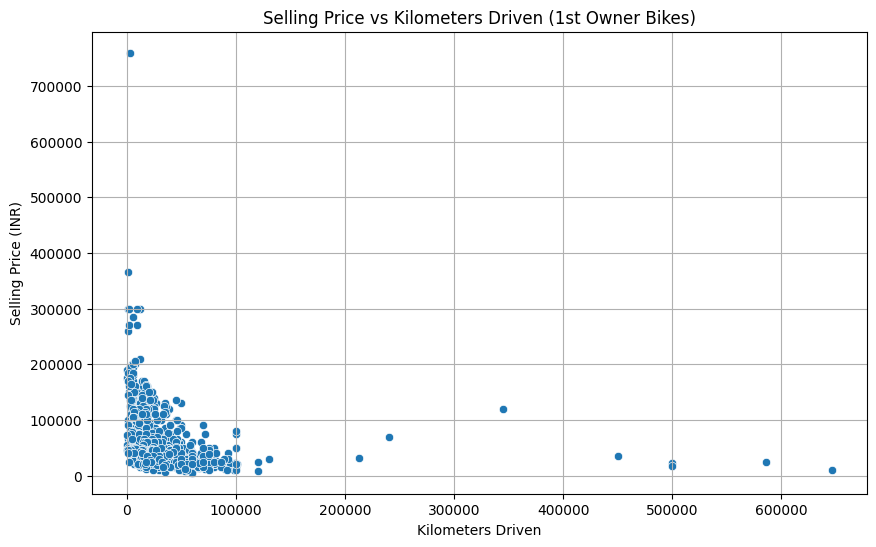

Correlation between km_driven and selling_price (1st owner): -0.24


In [ ]:
#Q.10. What is the relationship between selling_price and km_driven for first-owner bikes

# Filter to only '1st owner' bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs Kilometers Driven (1st Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"Correlation between km_driven and selling_price (1st owner): {correlation:.2f}")

In [ ]:
#Q.11.  Identify and remove outliers in the km_driven column using the IQR method
# Step 1: Calculate Q1 and Q3 for 'km_driven'
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 4: Print results
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_no_outliers)}")
print(f"Number of outliers removed: {len(df) - len(df_no_outliers)}")

Original dataset size: 1061
Dataset size after removing outliers: 1022
Number of outliers removed: 39


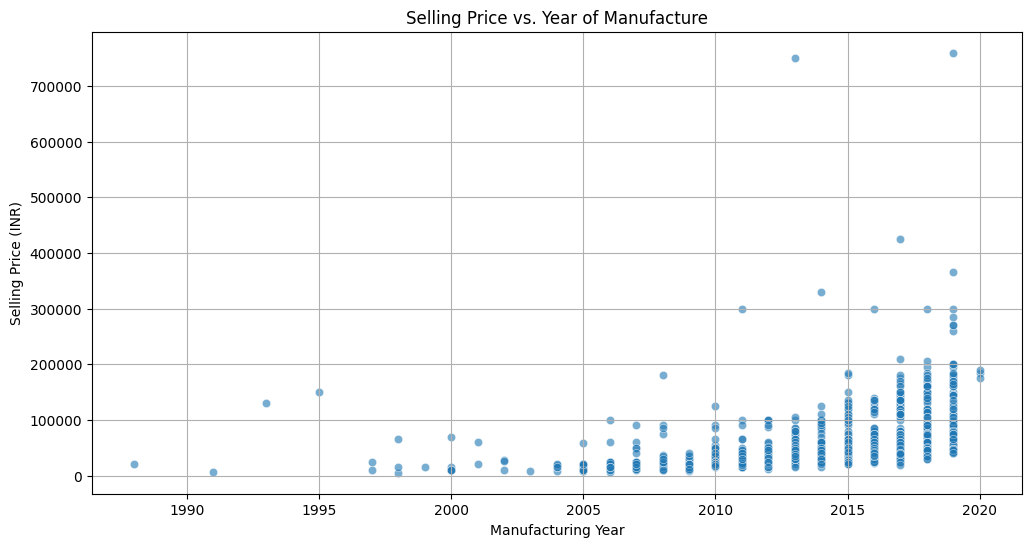

In [ ]:
#Q.12  Perform a bivariate analysis to visualize the relationship between year and selling_price
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.show()

In [ ]:
#Q.13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
#year
# Current year
current_year = 2025  # Update if needed based on current year

# Step 1: Calculate the age of the bike
df['age'] = current_year - df['year']

# Step 2: Calculate the depreciation (difference between original price and selling price)
# Note: Assuming 'ex_showroom_price' is the original price at the showroom
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Step 3: Group by age and calculate average depreciation
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean().reset_index()

# Step 4: Visualize or print the result
print(avg_depreciation_by_age)

    age  depreciation
0     5 -34260.000000
1     6   2954.562500
2     7  13023.194805
3     8  22306.082353
4     9  28328.190476
5    10  28013.275000
6    11  34505.606061
7    12  43086.886792
8    13  37317.648649
9    14  47102.666667
10   15  45658.928571
11   16  38227.785714
12   17  54732.428571
13   18  42399.000000
14   19  39664.500000
15   20  44852.000000
16   21  36852.000000
17   22           NaN
18   23           NaN
19   24  34852.000000
20   25           NaN
21   26           NaN
22   27           NaN
23   28           NaN
24   30           NaN
25   32           NaN
26   34           NaN
27   37           NaN


In [ ]:
#Q.14.  Which bike names are priced significantly above the average price for their manufacturing year
# Current year
current_year = 2025  # Update if needed based on current year

# Step 1: Calculate average selling price per year
avg_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_per_year.rename(columns={'selling_price': 'avg_price'}, inplace=True)

# Step 2: Merge average prices with the original dataframe
df = df.merge(avg_price_per_year, on='year', how='left')

# Step 3: Define a significant price threshold (e.g., 20% above the average price)
threshold_factor = 1.2  # 20% above the average

# Step 4: Filter bikes that are priced significantly above the average
above_avg_bikes = df[df['selling_price'] > df['avg_price'] * threshold_factor]

# Step 5: List bike names of those bikes
significantly_above_avg_bikes = above_avg_bikes[['name', 'year', 'selling_price', 'avg_price']]
print(significantly_above_avg_bikes)

                                      name  year  selling_price      avg_price
0                Royal Enfield Classic 350  2019         175000  119689.511628
2      Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714
13                           Yamaha YZF R3  2019         365000  119689.511628
17                        Yamaha YZF R15 S  2010          40000   31793.333333
...                                    ...   ...            ...            ...
984              Royal Enfield Classic 500  2014          95000   48668.131868
985              Royal Enfield Classic 500  2011          90000   35655.721311
1005                    TVS Apache RTR 160  2014          60000   48668.131868
1008                    Bajaj Pulsar 220 F  2012          52000   35748.400000
1023                Bajaj Avenger 220 dtsi  2012          45000   35748.400000

[233 rows x 4 columns]


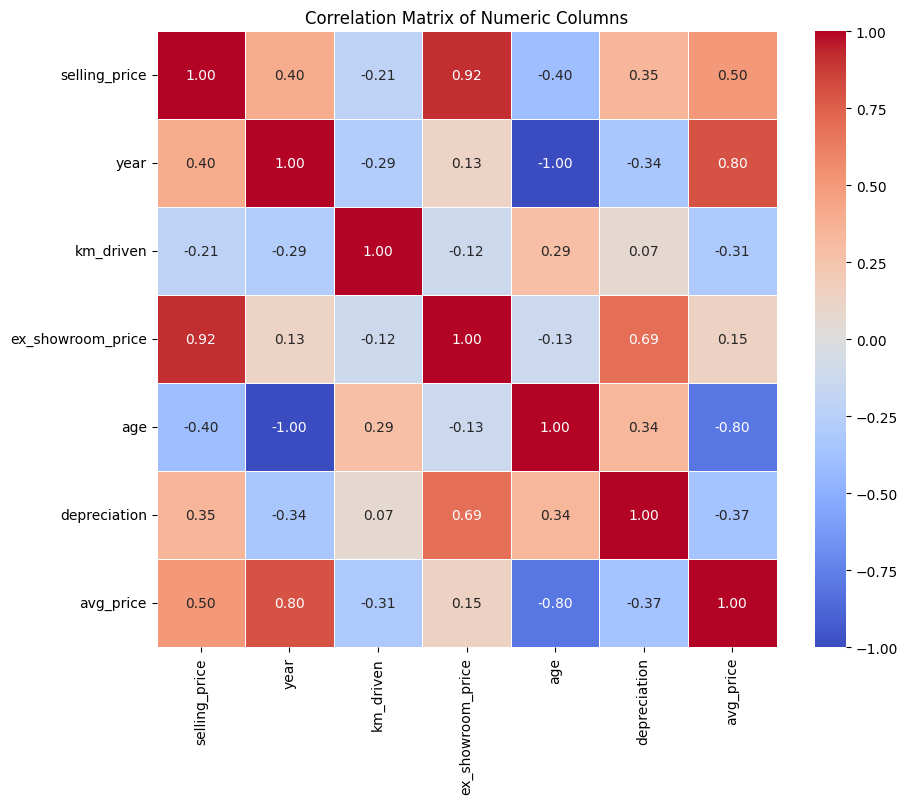

In [ ]:
#Q.15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.
# Step 1: Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


**EDA - 2**

**Title: Car Sale Dataset**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
#Q.1.What is the average selling price of cars for each dealer, and how does it compare across different dealers
# Group by dealer and calculate average price
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Sort for easier comparison
avg_price_by_dealer = avg_price_by_dealer.sort_values(by='Price ($)', ascending=False)

# Display results
print(avg_price_by_dealer)


                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

In [ ]:
#Q.2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends?
# Group by company and calculate price standard deviation
price_variation = df.groupby('Company')['Price ($)'].std().reset_index()

# Rename for clarity and sort
price_variation = price_variation.rename(columns={'Price ($)': 'Price StdDev'})
price_variation = price_variation.sort_values(by='Price StdDev', ascending=False)

# Show the company with the highest variation
print(price_variation.head())


     Company  Price StdDev
15   Lincoln  19658.050211
24      Saab  19653.740089
4   Cadillac  19517.120220
21  Plymouth  19065.997338
14     Lexus  17852.923492


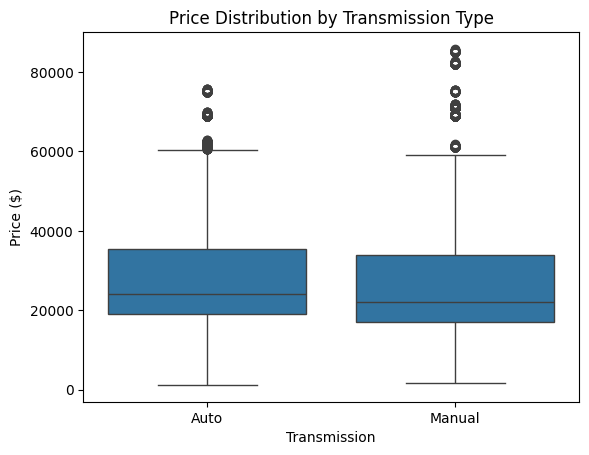

                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [ ]:
#Q.3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare?
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to show distribution & IQR
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()

# Calculate IQR manually
iqr_data = df.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
iqr_data['IQR'] = iqr_data[0.75] - iqr_data[0.25]

print(iqr_data[['IQR']])


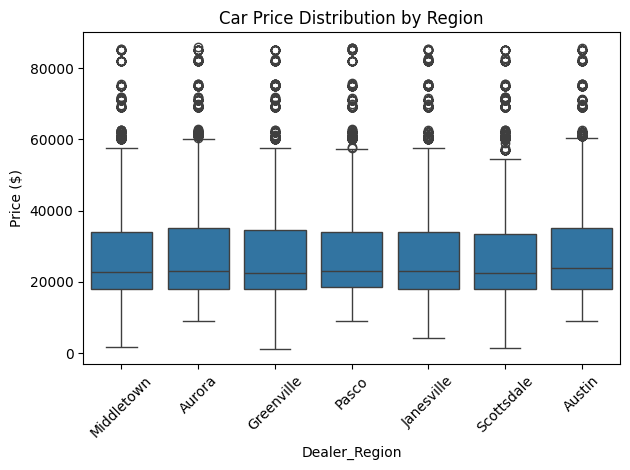

In [ ]:
#Q.4.What is the distribution of car prices across different regions?
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

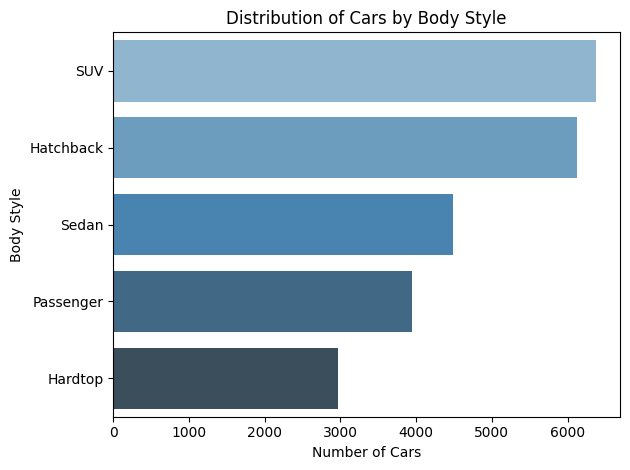

In [ ]:
#Q.5.What is the distribution of cars based on body styles?
body_style_counts = df['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['Body Style', 'Count']
sns.barplot(x='Count', y='Body Style', data=body_style_counts, palette='Blues_d')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Number of Cars')
plt.ylabel('Body Style')
plt.tight_layout()
plt.show()

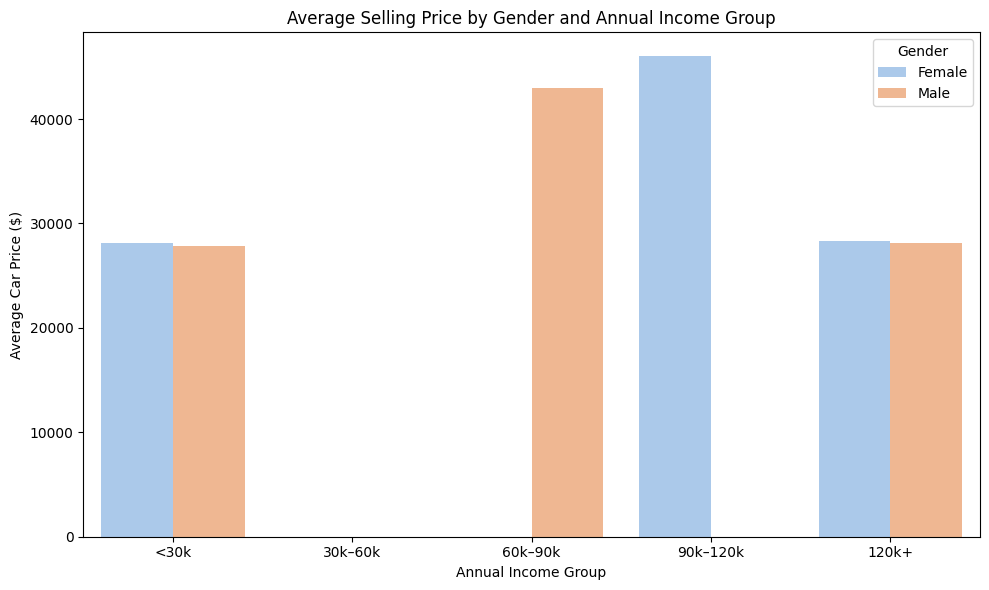

In [ ]:
#Q.6.  How does the average selling price of cars vary by customer gender and annual income?
# Create income bins to group customers
df['Income Group'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 90000, 120000, float('inf')],
                            labels=['<30k', '30k–60k', '60k–90k', '90k–120k', '120k+'])

# Group by gender and income group, then calculate mean price
avg_price = df.groupby(['Gender', 'Income Group'])['Price ($)'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Group', y='Price ($)', hue='Gender', data=avg_price, palette='pastel')
plt.title('Average Selling Price by Gender and Annual Income Group')
plt.ylabel('Average Car Price ($)')
plt.xlabel('Annual Income Group')
plt.tight_layout()
plt.show()

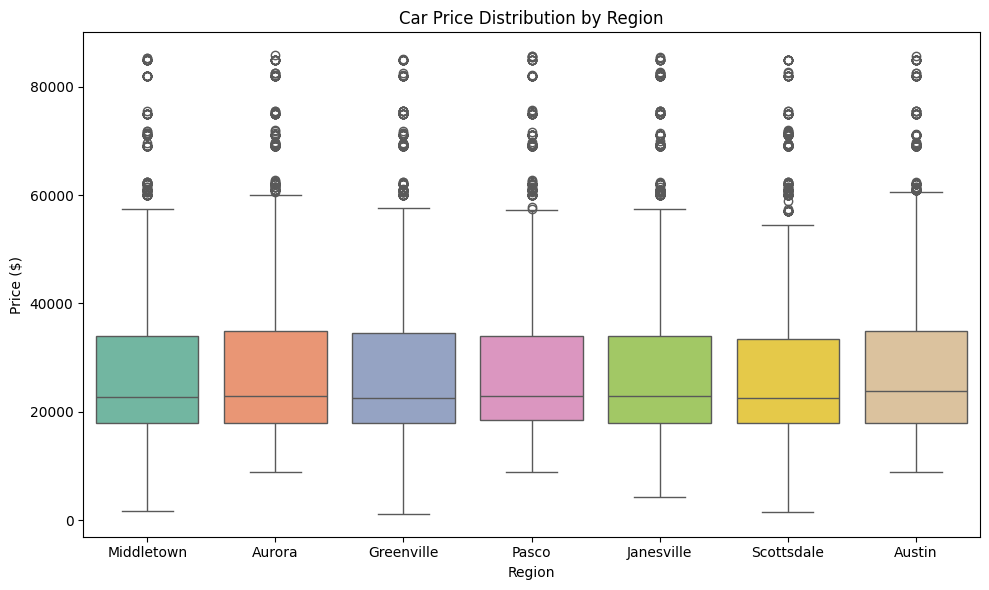

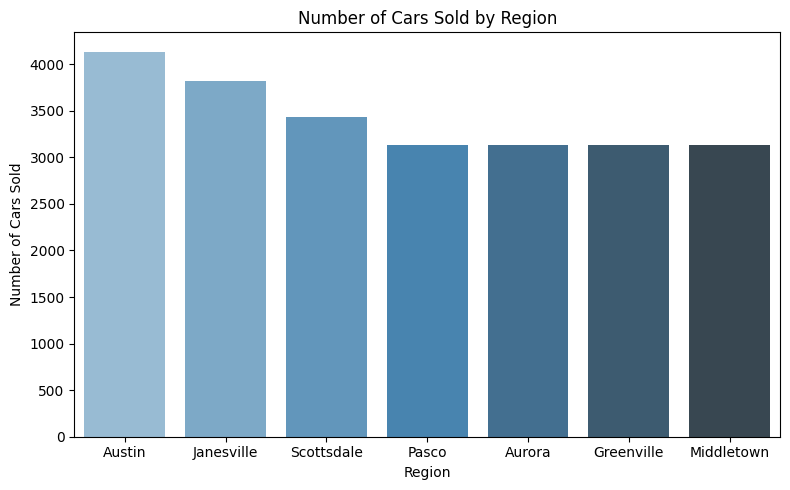

In [ ]:
#Q.7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
#Price distribution by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set2')
plt.title('Car Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

#Number of cars sold  by region

car_counts = df['Dealer_Region'].value_counts().reset_index()
car_counts.columns = ['Dealer_Region', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='Dealer_Region', y='Count', data=car_counts, palette='Blues_d')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()

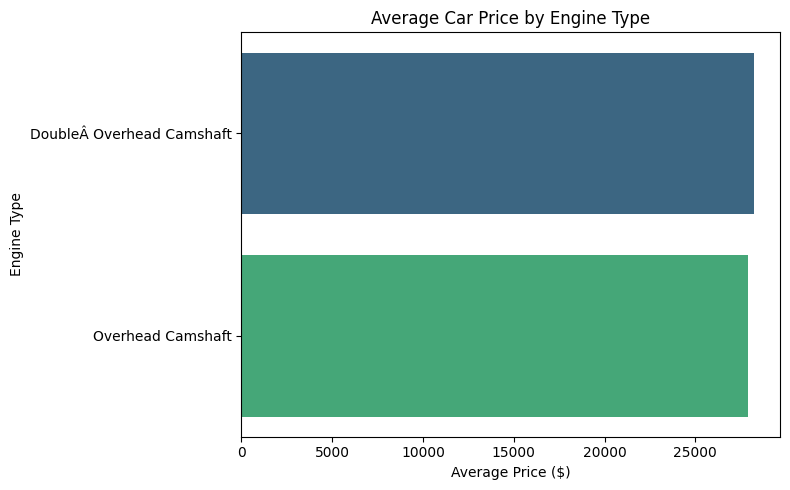

In [ ]:
#Q.8.How does the average car price differ between cars with different engine sizes?
# Group by engine type and compute average price
avg_price_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()

# Sort for better visualization
avg_price_engine = avg_price_engine.sort_values(by='Price ($)', ascending=False)

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x='Price ($)', y='Engine', data=avg_price_engine, palette='viridis')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()

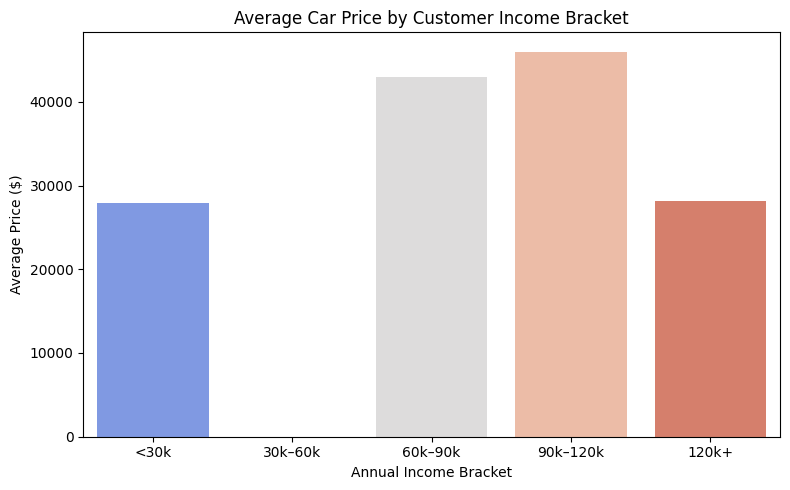

In [ ]:
 #Q.9.How do car prices vary based on the customer’s annual income bracket?
 # Create income brackets
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 90000, 120000, float('inf')],
                              labels=['<30k', '30k–60k', '60k–90k', '90k–120k', '120k+'])

# Calculate average price per income bracket
avg_price_income = df.groupby('Income Bracket')['Price ($)'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Income Bracket', y='Price ($)', data=avg_price_income, palette='coolwarm')
plt.title('Average Car Price by Customer Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

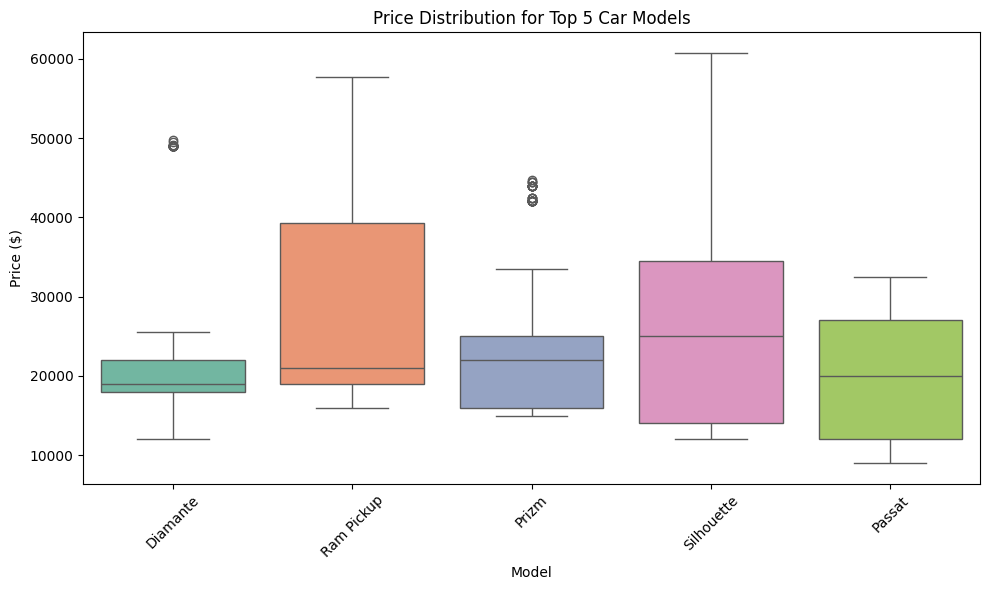

In [ ]:
#Q.10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
# Get the top 5 car models with the highest number of sales
top_models = df['Model'].value_counts().head(5).index

# Filter the dataset for these top 5 models
top_models_data = df[df['Model'].isin(top_models)]

# Plot price distribution for these top 5 models
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_data, palette='Set2')
plt.title('Price Distribution for Top 5 Car Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

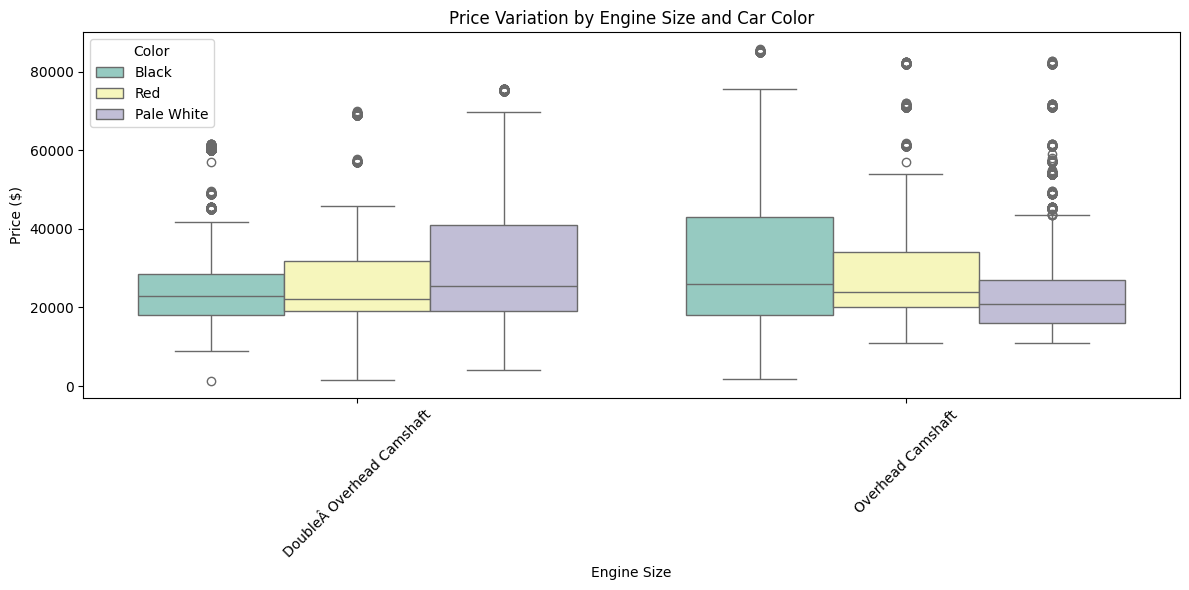

        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


In [ ]:
#Q.11. How does car price vary with engine size across different car colors, and which colors have the highest price
#variation?
# Step 1: Plot price variation by engine size and car color
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df, palette='Set3')
plt.title('Price Variation by Engine Size and Car Color')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Calculate price variation for each car color (standard deviation)
price_variation_by_color = df.groupby('Color')['Price ($)'].std().reset_index()

# Sort by price variation
price_variation_by_color = price_variation_by_color.sort_values(by='Price ($)', ascending=False)

# Show the top colors with highest price variation
print(price_variation_by_color.head())

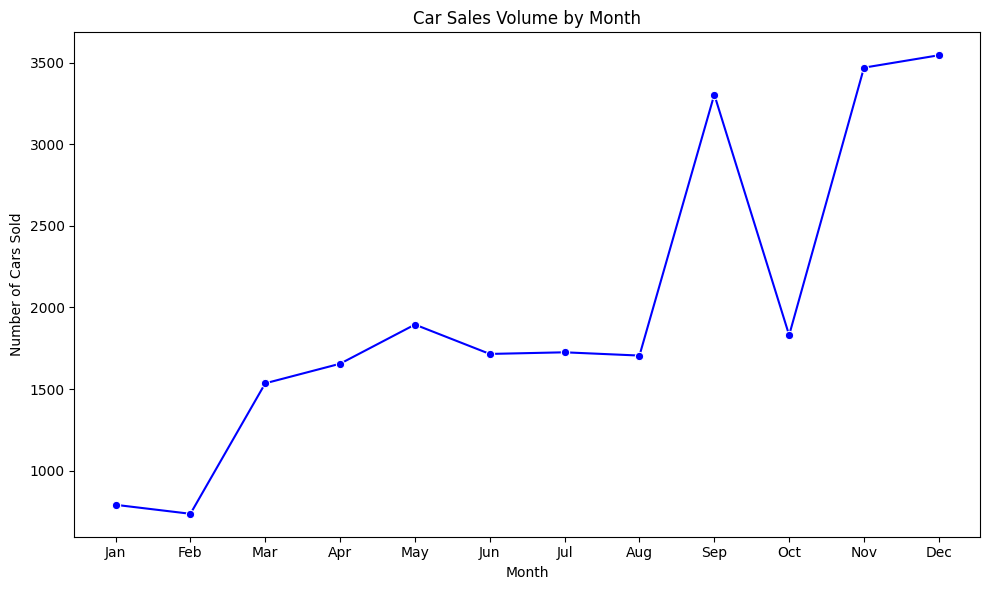

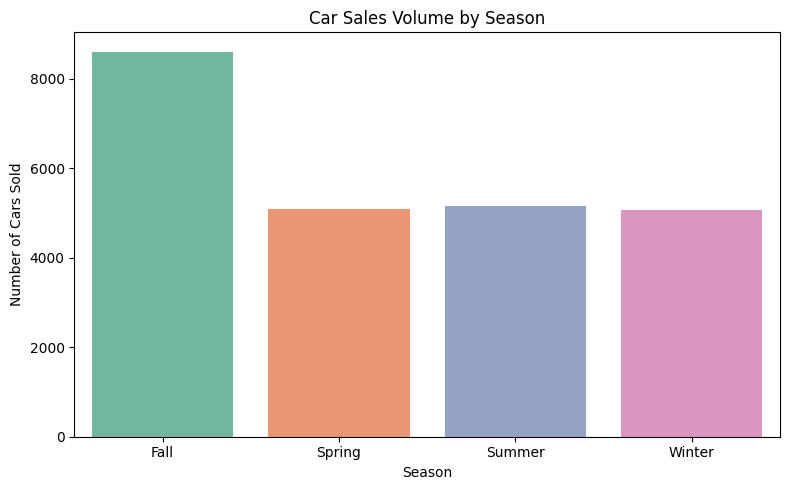

In [ ]:
#Q.12 Is there any seasonal trend in car sales based on the date of sale
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and season
df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                 else ('Spring' if x in [3, 4, 5]
                                       else ('Summer' if x in [6, 7, 8]
                                             else 'Fall')))

# Step 1: Sales volume per month
sales_by_month = df.groupby('Month')['Car_id'].count().reset_index()

# Step 2: Sales volume per season
sales_by_season = df.groupby('Season')['Car_id'].count().reset_index()

# Plotting sales by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Car_id', data=sales_by_month, marker='o', color='b')
plt.title('Car Sales Volume by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Plotting sales by season
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Car_id', data=sales_by_season, palette='Set2')
plt.title('Car Sales Volume by Season')
plt.xlabel('Season')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()


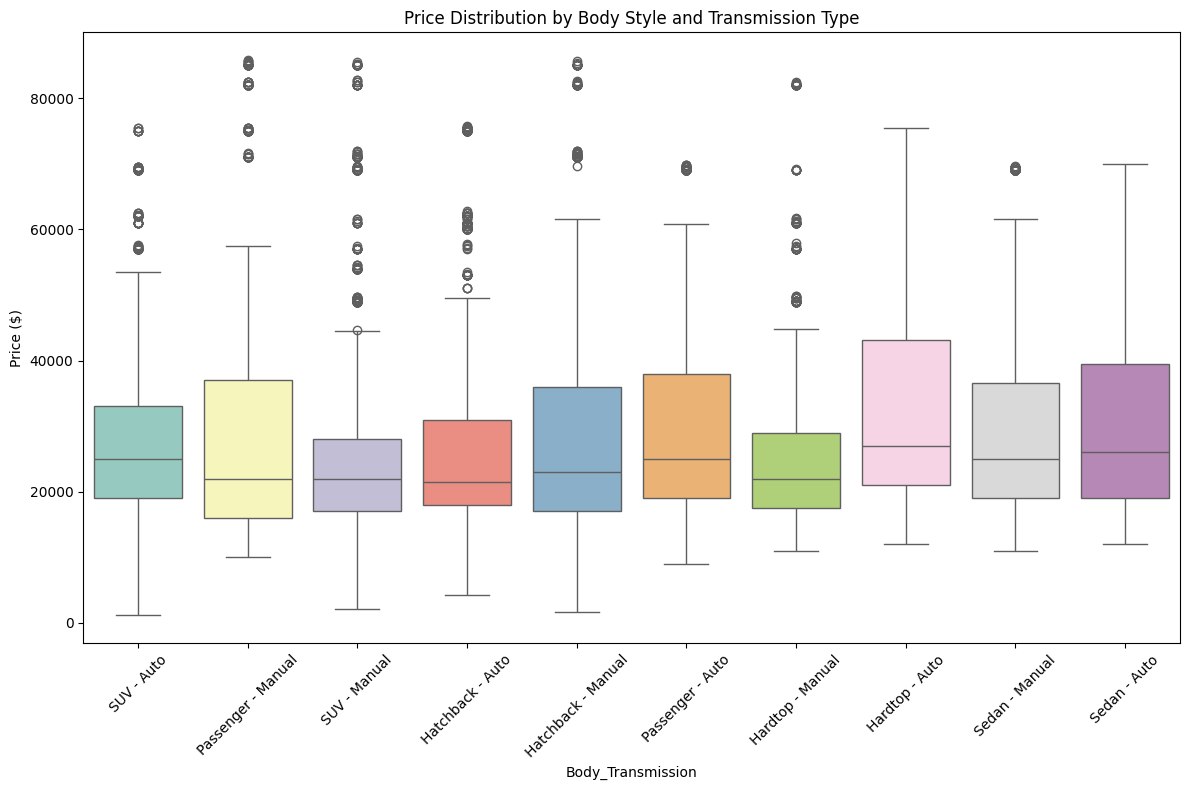

In [ ]:
#Q.13 How does the car price distribution change when considering different combinations of body style and
#transmission type?
# Create a new column for the combination of body style and transmission type
df['Body_Transmission'] = df['Body Style'] + ' - ' + df['Transmission']

# Plot price distribution for each body style and transmission combination
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body_Transmission', y='Price ($)', data=df, palette='Set3')
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

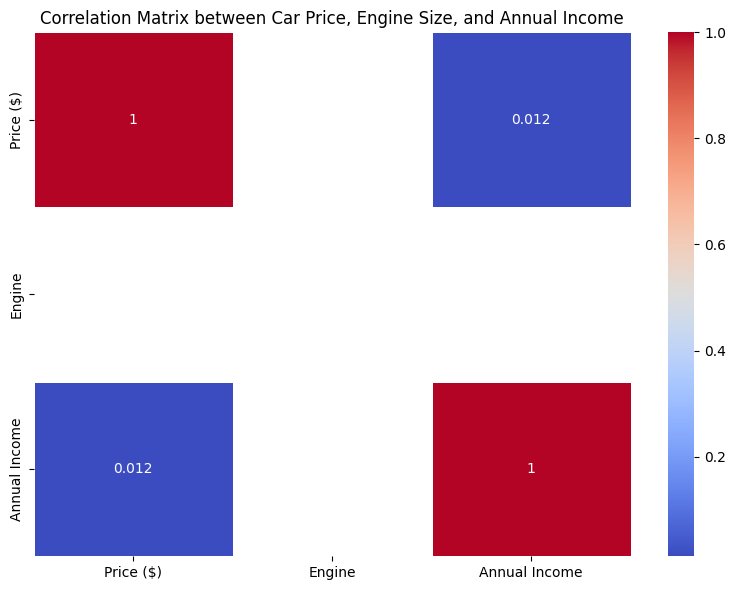

In [ ]:
#Q.14. What is the correlation between car price, engine size, and annual income of customers, and how do these
#features interact?


df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

# Convert 'Engine' to numeric by mapping engine types to numbers (e.g., I4 -> 4, V6 -> 6)
engine_mapping = {
    'I4': 4, 'I3': 3, 'V6': 6, 'V8': 8, 'I6': 6, 'V10': 10, 'V12': 12
}

# Apply mapping (if there are engine types not in the map, they will be converted to NaN)
df['Engine'] = df['Engine'].map(engine_mapping)

# Now compute the correlation matrix
corr_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Car Price, Engine Size, and Annual Income')
plt.tight_layout()
plt.show()


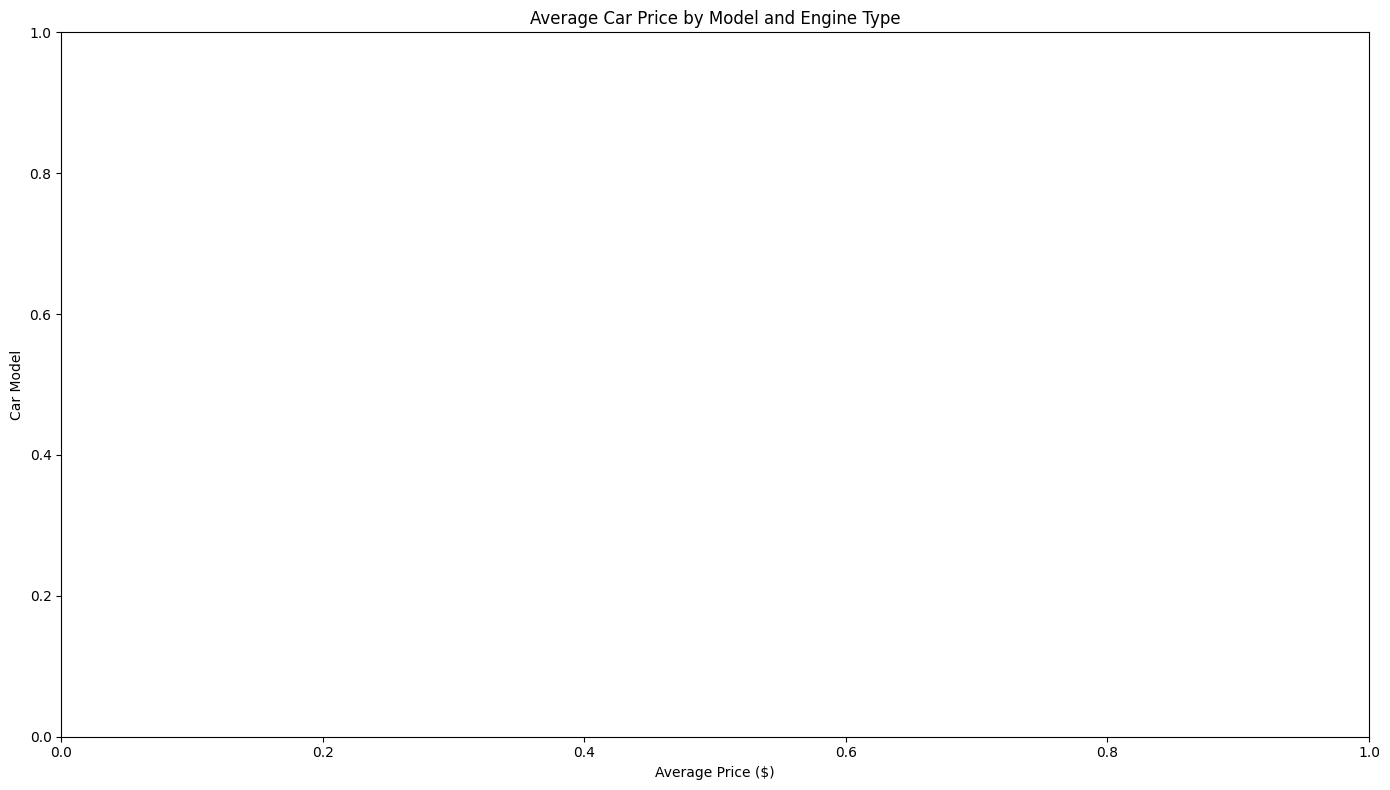

In [ ]:
#Q.15. How does the average car price vary across different car models and engine types?
# Group by 'Model' and 'Engine', and compute the average price
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Sort values for better visualization
avg_price_by_model_engine = avg_price_by_model_engine.sort_values(by='Price ($)', ascending=False)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='Price ($)', y='Model', hue='Engine', data=avg_price_by_model_engine, palette='coolwarm')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

**EDA 3**

**Amazon sales data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('amazon.csv')
df
#

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
#Q.1.' What is the average rating for each product categoryk



# Convert the 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now, group by category and calculate the average rating for each category
average_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Sort values by average rating in descending order for better visualization
average_rating_by_category = average_rating_by_category.sort_values(by='rating', ascending=False)

# Display the result
print(average_rating_by_category)



                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


In [ ]:
#Q.2What are the top rating_count products by category?
# Group by 'category' and 'product_name' to find the product with the maximum 'rating_count' within each category
top_products_by_rating_count = df.loc[df.groupby('category')['rating_count'].idxmax()]

# Display the results
top_products_by_rating_count = top_products_by_rating_count[['category', 'product_name', 'rating_count']]
print(top_products_by_rating_count)


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772   H

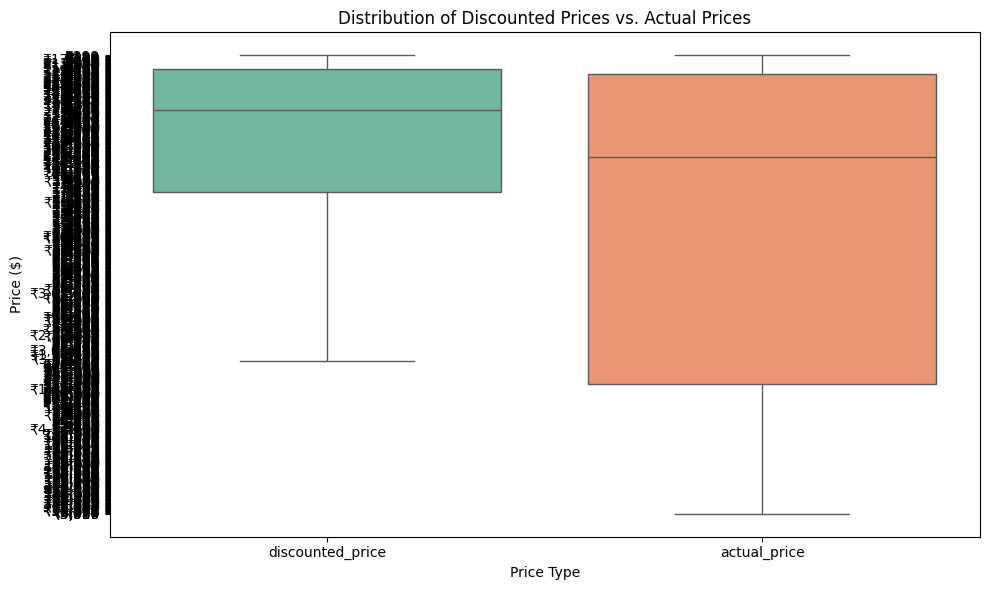

In [ ]:
#Q.3 What is the distribution of discounted prices vs. actual prices

# Melt the dataset to reshape for plotting (long format)
df_melted = df[['discounted_price', 'actual_price']].melt(var_name='Price Type', value_name='Price')

# Create a boxplot to compare the distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Type', y='Price', data=df_melted, palette='Set2')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

In [ ]:
#Q.4.' How does the average discount percentage vary across categories


df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

# Now group by category and calculate the average discount percentage for each category
average_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# Sort values by average discount percentage for better visualization
average_discount_by_category = average_discount_by_category.sort_values(by='discount_percentage', ascending=False)

# Display the result
print(average_discount_by_category)


                                              category  discount_percentage
6    Computers&Accessories|Accessories&Peripherals|...                 90.0
75   Electronics|Headphones,Earbuds&Accessories|Ear...                 90.0
106  Electronics|Mobiles&Accessories|MobileAccessor...                 90.0
73   Electronics|Headphones,Earbuds&Accessories|Ada...                 88.0
14   Computers&Accessories|Accessories&Peripherals|...                 87.5
..                                                 ...                  ...
197  OfficeProducts|OfficeElectronics|Calculators|F...                  0.0
199  OfficeProducts|OfficePaperProducts|Paper|Copy&...                  0.0
205  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [ ]:
#Q.5 What are the most popular product names

# Convert the 'rating_count' column to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Group by product_name and calculate the total number of rating counts for each product
most_popular_products = df.groupby('product_name')['rating_count'].sum().reset_index()

# Sort the products by rating_count in descending order to find the most popular products
most_popular_products = most_popular_products.sort_values(by='rating_count', ascending=False)

# Display the top 10 most popular products
print(most_popular_products.head(10))



                                           product_name  rating_count
325   Duracell USB Lightning Apple Certified (Mfi) B...        2445.0
1237  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...        1948.0
121   Ambrane 2 in 1 Type-C & Micro USB Cable with 6...        1806.0
1179  Wecool Unbreakable 3 in 1 Charging Cable with ...        1312.0
1022  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...        1151.0
947   SWAPKART Fast Charging Cable and Data Sync USB...        1072.0
363   Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
365        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
807   Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
1239  Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0


In [ ]:
#Q.6.What are the most popular product keywords

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Combine product names and descriptions into a single text for keyword extraction
product_text = df['product_name'].dropna().tolist() + df['about_product'].dropna().tolist()

# Initialize CountVectorizer to extract the top keywords
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Fit the model and transform the product text
X = vectorizer.fit_transform(product_text)

# Get the most common keywords and their frequencies
keywords = vectorizer.get_feature_names_out()
frequencies = X.sum(axis=0).A1

# Combine the keywords with their frequencies and sort them
keyword_freq = list(zip(keywords, frequencies))
keyword_freq.sort(key=lambda x: x[1], reverse=True)

# Display the top 10 most common keywords
print(keyword_freq[:10])


[('usb', np.int64(1647)), ('cable', np.int64(1333)), ('charging', np.int64(909)), ('type', np.int64(876)), ('warranty', np.int64(814)), ('high', np.int64(671)), ('power', np.int64(654)), ('devices', np.int64(639)), ('easy', np.int64(636)), ('fast', np.int64(636))]


In [ ]:
#Q.7.What are the most popular product reviews?
# Group by product_name and sort reviews by rating_count in descending order to find the most popular reviews
most_popular_reviews = df.groupby('product_name').apply(lambda x: x.sort_values('rating_count', ascending=False))

# Get the top 5 most popular reviews based on rating_count
top_reviews = most_popular_reviews[['product_name', 'review_title', 'review_content', 'rating_count']].head(5)

# Display the top reviews
print(top_reviews)



                                                                                              product_name  \
product_name                                                                                                 
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!... 1158  !!1000 Watt/2000-Watt Room Heater!! Fan Heater...   
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan... 1292  !!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...   
10WeRun Id-116 Bluetooth Smartwatch Wireless Fi... 549   10WeRun Id-116 Bluetooth Smartwatch Wireless F...   
10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultr... 137   10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...   
3M Post-it Sticky Note Cube, 200 Sheets (4 Colo... 825   3M Post-it Sticky Note Cube, 200 Sheets (4 Col...   

                                                                                              review_title  \
product_name                                                                                                 
!!1000 Wa

In [ ]:
#Q.8.What is the correlation between discounted_price and rating?

# Ensure 'discounted_price' and 'rating' are numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the correlation between discounted_price and rating
correlation = df[['discounted_price', 'rating']].corr()

# Display the correlation matrix
print(correlation)


                  discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     1.0


In [ ]:
#Q.9.  What are the Top 5 categories based on the highest ratings

# Ensure the rating column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate the average rating for each category
average_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Sort the categories by average rating in descending order to get the top 5
top_categories = average_rating_by_category.sort_values(by='rating', ascending=False).head(5)

# Display the result
print(top_categories)


                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


Q.10. Identify any potential areas for improvement or optimization based on the data analysis?

Based on the data analysis of Amazon product listings, here are some potential areas for improvement or optimization that can be identified:

1. Pricing Strategy Optimization
Discounted vs. Actual Price: Analyze the relationship between discounted prices and actual prices. If most products are heavily discounted, it may suggest that pricing strategies are not optimized, or products may be perceived as less valuable when discounted too frequently. Optimization Suggestion: Consider adjusting discount strategies or offering fewer but more impactful discounts.

Price by Category: Categories with significant pricing differences (e.g., large variation in prices for similar products) may benefit from more competitive pricing. Optimization Suggestion: Identify underpriced or overpriced categories and adjust pricing to maximize sales and margins.

2. Review and Rating Enhancement
Low-Rated Products: Products with low ratings (e.g., 1-2 stars) could be areas for improvement, especially if there are multiple reviews pointing out common issues. Optimization Suggestion: Investigate customer feedback for these low-rated products to identify quality concerns, improve product features, or improve customer satisfaction with better service.

Review Sentiment: If products have many reviews but low ratings, there may be an issue with customer expectations or product descriptions. Optimization Suggestion: Adjust product descriptions or improve product quality based on feedback.

3. Category-Level Improvements
Low-Rated Categories: Based on the analysis of average ratings by category, identify categories that are underperforming in terms of customer satisfaction. Optimization Suggestion: Focus on improving products within these categories, either by better product selection, improved features, or better vendor management.

Category Analysis: Identify the top-rated categories. If certain categories are excelling, consider expanding the product range within those categories or investing in marketing for these high-performing categories.

4. Product Listing Optimization
Keyword Optimization: Based on popular keywords, optimize product titles, descriptions, and metadata. If certain keywords are more frequently searched or have higher conversion rates, they can be incorporated more effectively in the product listing to drive visibility. Optimization Suggestion: Revise product names and descriptions with higher-ranking keywords.

Product Descriptions and Review Titles: If product names and descriptions are too generic, adding more specific features or unique selling points can help. Optimization Suggestion: Consider revamping product descriptions to highlight key benefits or features that customers value the most.

5. Sales Performance by Region
Regional Pricing/Discount Strategies: If certain regions are performing better than others, consider creating targeted pricing strategies or promotions tailored to those regions. Optimization Suggestion: Adjust marketing, pricing, and promotional efforts in regions where sales are weak.

Stocking and Distribution Optimization: If certain regions show high demand for specific categories or products, this can guide inventory stocking and distribution strategies. Optimization Suggestion: Increase stock for high-demand products in regions with higher sales potential.

6. Customer Demographics & Behavior
Gender-Based Insights: If there are significant differences in product preferences by gender, consider targeted marketing or product recommendations based on gender. Optimization Suggestion: Create tailored marketing campaigns that resonate more with male or female customers.

Income Segmentation: By analyzing how prices vary based on annual income, you can adjust your product offerings or marketing strategies to better target specific income groups. Optimization Suggestion: Consider offering premium or budget-friendly alternatives for different income brackets to appeal to a wider audience.

7. Stock Availability and Lead Time
Availability of Popular Products: If top-rated or top-selling products are frequently out of stock, this could hurt customer satisfaction and sales. Optimization Suggestion: Improve inventory management to ensure popular products remain available, and use predictive models to forecast demand for these products.

Shipping Time Analysis: If the analysis reveals significant variations in shipping times or delivery expectations, consider optimizing fulfillment strategies. Optimization Suggestion: Improve warehouse management and collaborate with faster shipping services to reduce delivery times.

8. Product Bundling and Cross-Selling
Cross-Category Analysis: By analyzing which products are frequently purchased together, you could create bundles to offer additional value to customers and increase average order value. Optimization Suggestion: Implement a cross-selling strategy based on this analysis, promoting complementary products in product descriptions or during checkout.

9. Sentiment Analysis of Reviews
Review Sentiment Trend: If negative sentiment is identified in the reviews, a more thorough investigation into specific issues (like product defects or misleading descriptions) can help. Optimization Suggestion: Use the insights from sentiment analysis to continuously improve products and address recurring complaints.

10. Visual Appeal and Image Quality
Product Images: If certain products are underperforming, it could be related to image quality. High-resolution and attractive images often correlate with higher conversion rates. Optimization Suggestion: Enhance product images and make sure they represent the product accurately.

**EDA - 4**
#Spotify data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [ ]:
#Q.1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful

# Step 1: Read the dataset
df = pd.read_csv("spotify.csv")
# Step 2: Check for null values
print("Null values per column:\n", df.isnull().sum())

# Drop rows with null values (or handle them as needed)
df = df.dropna()

# Step 3: Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Display the cleaned dataset shape
print("\nShape of the cleaned dataset:", df.shape)

Null values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Shape of the cleaned dataset: (413, 5)


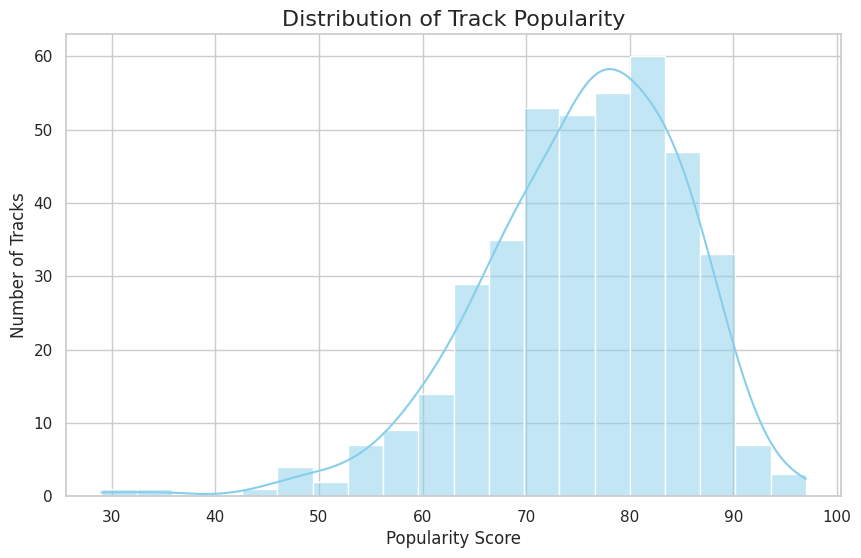

In [ ]:
#Q.2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

# Drop missing and duplicate rows for a clean analysis
df = df.dropna().drop_duplicates()

# Set style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')

# Show plot
plt.show()

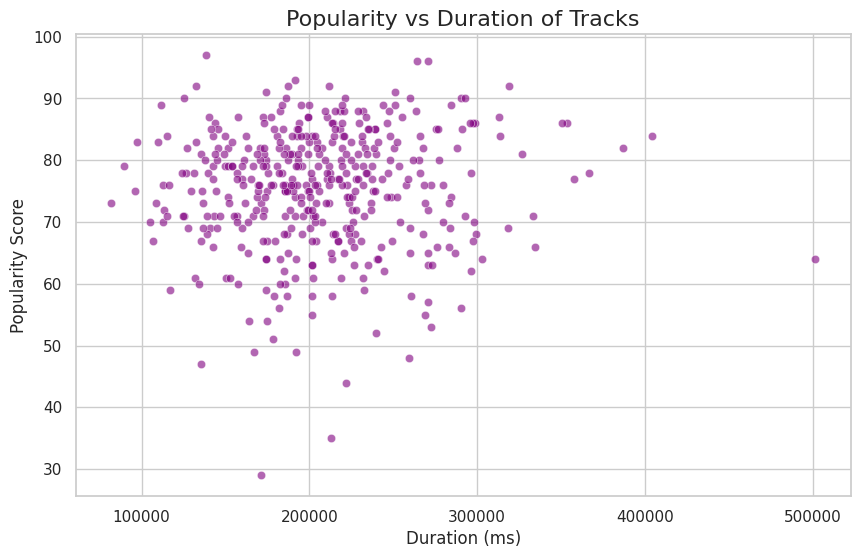

In [ ]:
#Q.3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot



df = df.dropna().drop_duplicates()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6, color='purple')

# Add titles and labels
plt.title('Popularity vs Duration of Tracks', fontsize=16)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity Score')

# Show plot
plt.show()


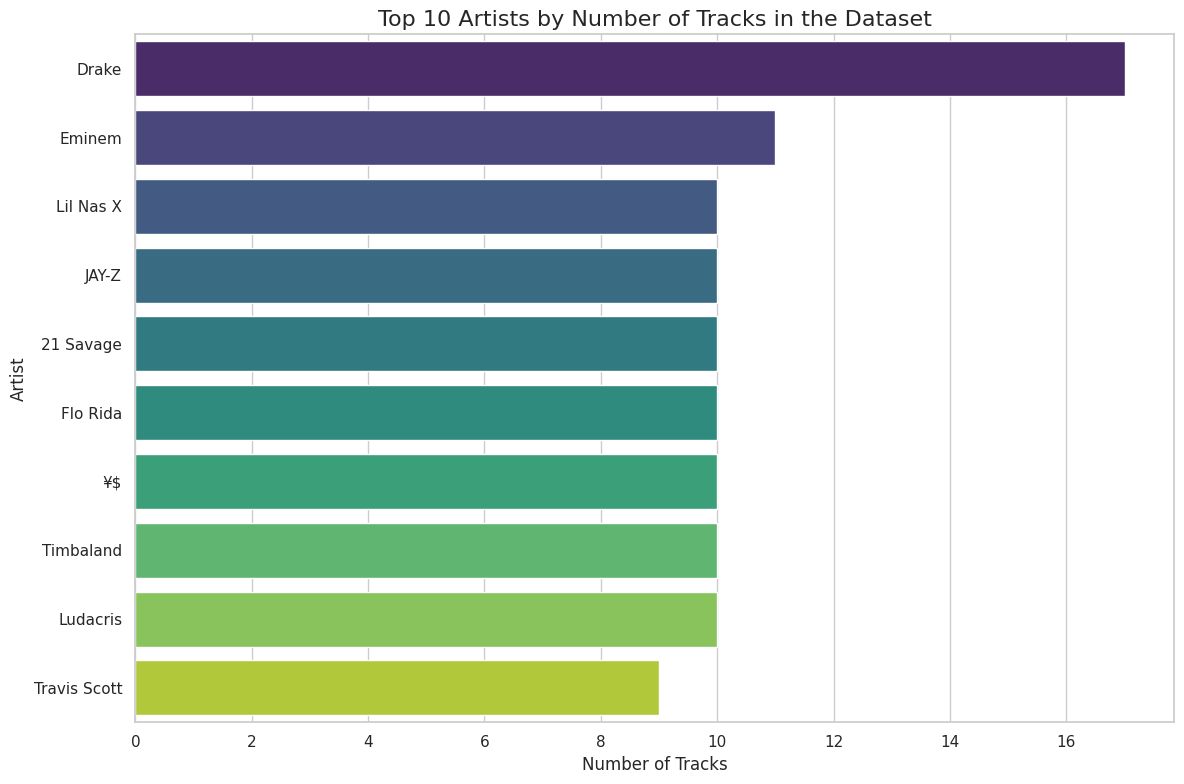

In [ ]:
#Q.4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot

df = df.dropna().drop_duplicates()

# Set plot style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(12, 8))

# Create countplot (top 10 artists for better visibility)
top_artists = df['Artist'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Artist'].isin(top_artists)], y='Artist', order=top_artists, palette='viridis')

# Add titles and labels
plt.title('Top 10 Artists by Number of Tracks in the Dataset', fontsize=16)
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Q.5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

df = df.dropna().drop_duplicates()

# Sort by popularity in ascending order and select top 5
least_popular = df.sort_values(by='Popularity', ascending=True).head(5)

# Display artist and track name
print("Top 5 Least Popular Tracks:")
print(least_popular[['Artist', 'Track Name', 'Popularity']])

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [ ]:
#Q.6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist

df = df.dropna().drop_duplicates()

# Step 1: Find the top 5 artists by number of tracks
top_artists = df['Artist'].value_counts().nlargest(5).index

# Step 2: Filter dataset for only those top 5 artists
top_artist_df = df[df['Artist'].isin(top_artists)]

# Step 3: Group by artist and calculate average popularity
avg_popularity = top_artist_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Display result
print("Average Popularity of Top 5 Most Frequent Artists:\n")
print(avg_popularity)

Average Popularity of Top 5 Most Frequent Artists:

Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [ ]:
#Q.7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
df = df.dropna().drop_duplicates()

# Step 1: Identify top 5 artists by track count
top_artists = df['Artist'].value_counts().nlargest(5).index

# Step 2: Filter the dataframe for those artists
top_artist_df = df[df['Artist'].isin(top_artists)]

# Step 3: For each artist, get the most popular track
most_popular_tracks = top_artist_df.sort_values(['Artist', 'Popularity'], ascending=[True, False])
top_tracks = most_popular_tracks.groupby('Artist').first().reset_index()

# Step 4: Display artist and their most popular track
print("Most Popular Track for Each of the Top 5 Artists:\n")
print(top_tracks[['Artist', 'Track Name', 'Popularity']])

Most Popular Track for Each of the Top 5 Artists:

      Artist                               Track Name  Popularity
0  21 Savage                                   redrum          96
1      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
2     Eminem                               Without Me          90
3      JAY-Z                          Ni**as In Paris          86
4  Lil Nas X                        THATS WHAT I WANT          81


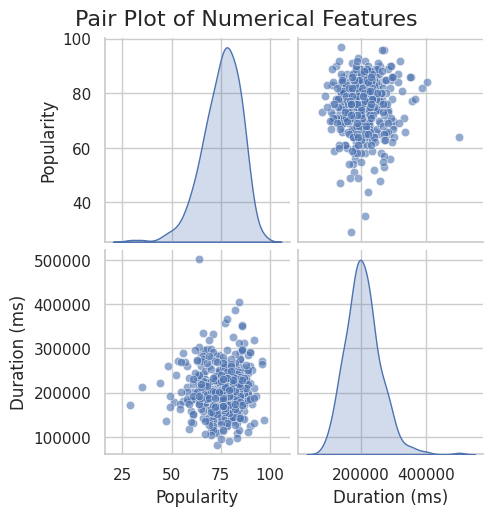

In [ ]:
#Q.8.Visualize relationships between multiple numerical variables simultaneously using a pair plot

df = df.dropna().drop_duplicates()

# Select only numerical columns for the pair plot
num_cols = ['Popularity', 'Duration (ms)']
sns.pairplot(df[num_cols], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})

# Show the plot
plt.suptitle("Pair Plot of Numerical Features", y=1.02, fontsize=16)
plt.show()

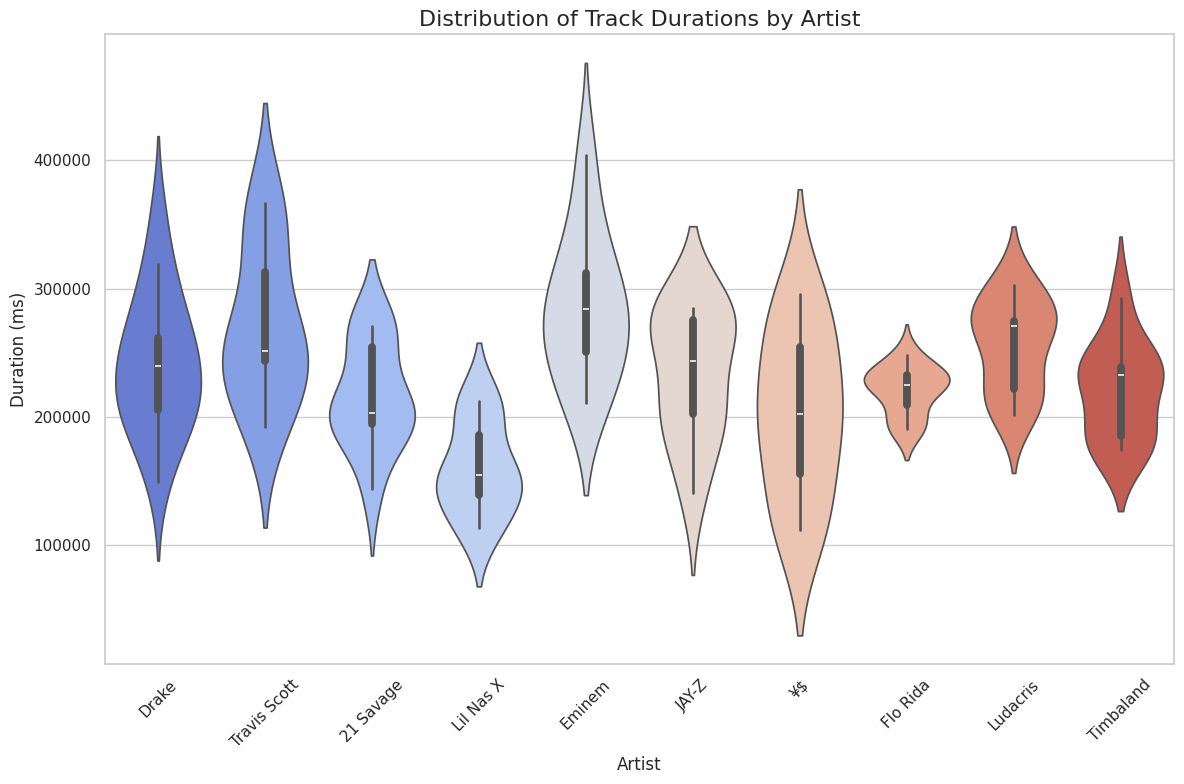

In [ ]:
#Q.9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot

df = df.dropna().drop_duplicates()

# Focus on top 10 artists by track count for clarity
top_artists = df['Artist'].value_counts().nlargest(10).index
filtered_df = df[df['Artist'].isin(top_artists)]

# Create violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='coolwarm')

# Add title and rotate x-axis labels for readability
plt.title('Distribution of Track Durations by Artist', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Duration (ms)')
plt.xlabel('Artist')

# Show plot
plt.tight_layout()
plt.show()

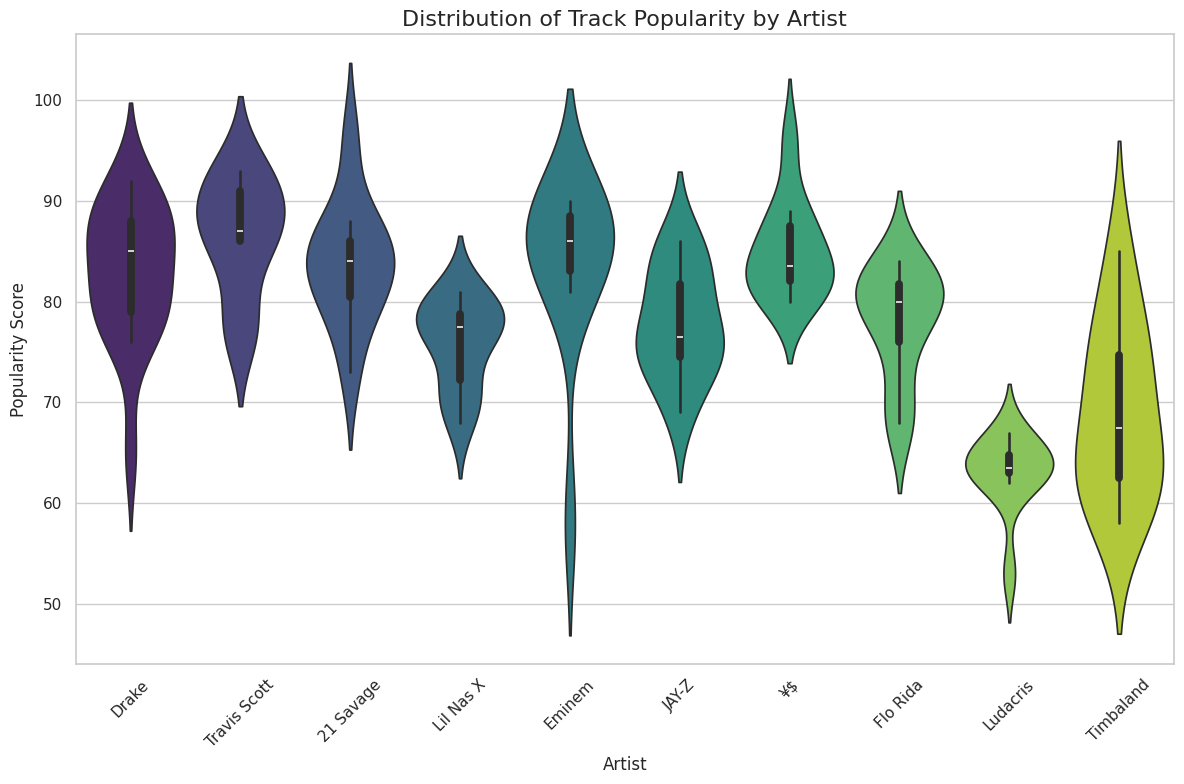

In [ ]:
#Q.10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot.

df = df.dropna().drop_duplicates()

# Focus on top 10 artists for clarity
top_artists = df['Artist'].value_counts().nlargest(10).index
filtered_df = df[df['Artist'].isin(top_artists)]

# Create violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='viridis')

# Add title and rotate x-axis labels for readability
plt.title('Distribution of Track Popularity by Artist', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Popularity Score')
plt.xlabel('Artist')

# Show plot
plt.tight_layout()
plt.show()